In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv("glass.csv")
df.isnull().sum()
labels=df.iloc[:,9]
features=df.drop(["glass_Type"],axis=1)

In [4]:
# Normalise the function
def norm_func(i):
    x=(i-i.min()/i.max()-i.min())
    return(x)
data=norm_func(features)

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2)

In [6]:
from sklearn.neighbors import KNeighborsClassifier as KN
model=KN(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
train_acc=np.mean(model.predict(x_train)==y_train)####81%
test_acc=np.mean(model.predict(x_test)==y_test)####67%

In [8]:
model=KN(n_neighbors=4)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [9]:
train_acc=np.mean(model.predict(x_train)==y_train)####73%
test_acc=np.mean(model.predict(x_test)==y_test)####69%
acc=[]


In [10]:
for i in range(4,50,2):
    model= KN(n_neighbors=i)
    model.fit(x_train,y_train)
    train_acc = np.mean(model.predict(x_train)==y_train)
    test_acc = np.mean(model.predict(x_test)==y_test)
    acc.append([train_acc,test_acc])


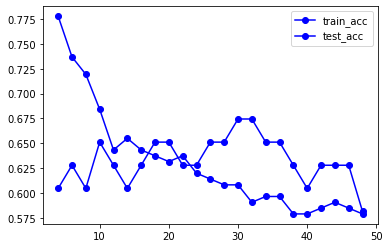

In [11]:
plt.plot(np.arange(4,50,2),[i[0] for i in acc],"bo-")
plt.plot(np.arange(4,50,2),[i[1] for i in acc],"bo-")
plt.legend(["train_acc","test_acc"])

In [12]:
model=KN(n_neighbors=13)
model.fit(x_train,y_train)
train_acc=np.mean(model.predict(x_train)==y_train)####70%
test_acc=np.mean(model.predict(x_test)==y_test)###58%